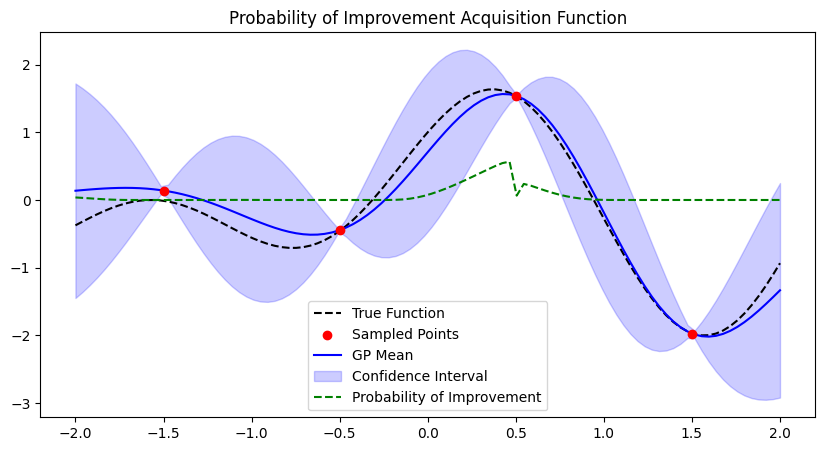

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def objective_function(x):
    """Simulated objective function (noisy sine wave)."""
    return np.sin(3 * x) + np.cos(2 * x) + np.random.normal(0, 0.1, size=x.shape)

def gaussian_process(x, X_samples, Y_samples, length_scale=0.5, noise=1e-6):
    """Simple Gaussian Process with RBF kernel."""
    kernel = lambda a, b: np.exp(-0.5 * np.subtract.outer(a, b) ** 2 / length_scale**2)
    K = kernel(X_samples, X_samples) + noise * np.eye(len(X_samples))
    K_s = kernel(x, X_samples)
    K_ss = kernel(x, x) + 1e-8 * np.eye(len(x))
    
    K_inv = np.linalg.inv(K)
    mu_s = K_s @ K_inv @ Y_samples
    cov_s = K_ss - K_s @ K_inv @ K_s.T
    sigma_s = np.sqrt(np.diag(cov_s))
    
    return mu_s, sigma_s

def probability_of_improvement(mu, sigma, best_Y, xi=0.01):
    """Computes the Probability of Improvement (PI) acquisition function values."""
    Z = (mu - best_Y - xi) / (sigma + 1e-9)
    return norm.cdf(Z)

# Define search space
X = np.linspace(-2, 2, 100)

# Sample some points
X_samples = np.array([-1.5, -0.5, 0.5, 1.5])
Y_samples = objective_function(X_samples)
best_Y = np.max(Y_samples)

# Compute GP predictions
mu, sigma = gaussian_process(X, X_samples, Y_samples)

# Compute Probability of Improvement values
PI = probability_of_improvement(mu, sigma, best_Y)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(X, np.sin(3 * X) + np.cos(2 * X), 'k--', label='True Function')
plt.scatter(X_samples, Y_samples, color='red', zorder=3, label='Sampled Points')
plt.plot(X, mu, 'b', label='GP Mean')
plt.fill_between(X, mu - 2 * sigma, mu + 2 * sigma, color='blue', alpha=0.2, label='Confidence Interval')
plt.plot(X, PI, 'g--', label='Probability of Improvement')
plt.legend()
plt.title("Probability of Improvement Acquisition Function")
plt.show()
